# Predicting Heart disease using Machine Learning

This notebook looks into various python-based machine learning and data science libraries in an attempt to build a machin learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given the clinical parameters of a patient can we predict whether or not they have heart disease?

## 2. Data

The Original data came form the UCI Machine learning repository https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, then we'll pursue the project

## 4. Features

This is where you'll get information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

<ol> 
    <li>  age - age in years </li>
    <li> sex  - (1 = male; 0 = female)</li>
    <li> cp - chest pain type
        <ul>
            <li>typical angina</li>
            <li>atypical angina</li>
            <li>non-anginal pain</li>
            <li>asymptomatic</li>
        </ul>
    </li>
    <li> trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern</li>
    <li> chol - serum cholestoral in mg/dl
        <ul> 
            <li>serum = LDL + HDL + .2 * triglycerides</li>
            <li>above 200 is cause for concern</li>
        </ul>
    </li>
    <li> fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        <ul>
            <li>'>126' mg/dL signals diabetes</li>
        </ul>
    </li>
    <li> restecg - resting electrocardiographic results
        <ul>
            <li>0: Nothing to note</li>
            <li>1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat</li>
            <li> 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber</li>
        </ul>
    </li>
    <li> thalach - maximum heart rate achieved</li>
    <li> exang - exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more</li>
    <li> slope - the slope of the peak exercise ST segment
        <ul>
            <li>0: Upsloping: better heart rate with excercise (uncommon)</li>
            <li>1: Flatsloping: minimal change (typical healthy heart)</li>
            <li>2: Downslopins: signs of unhealthy heart</li>
        </ul>
    </li>
    <li> ca - number of major vessels (0-3) colored by flourosopy
          <ul>
            <li>colored vessel means the doctor can see the blood passing through</li>
            <li>the more blood movement the better (no clots)</li>
            <li></li>
        </ul>
    </li>
    <li> thal - thalium stress result
          <ul>
            <li>1,3: normal</li>
            <li>6: fixed defect: used to be defect but ok now</li>
            <li>7: reversable defect: no proper blood movement when excercising</li>
        </ul>
    </li>
    <li> target - have disease or not (1=yes, 0=no) (= the predicted attribute)</li>
</ol>

## Preparing the tools

We're going to to use pandas, Matplotlib and numpy for Data analysis and manipulation.

In [1]:
# import all the tools we need
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

* What question(s) are we trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should we care about them?
* How can you add, remove or change features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# find out how many of each class there are 
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

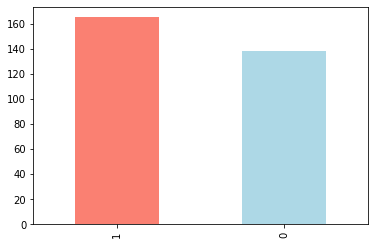

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's get some insights from data by seeing how our features relate target variable

### Heart Disease Frequency according to Sex

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

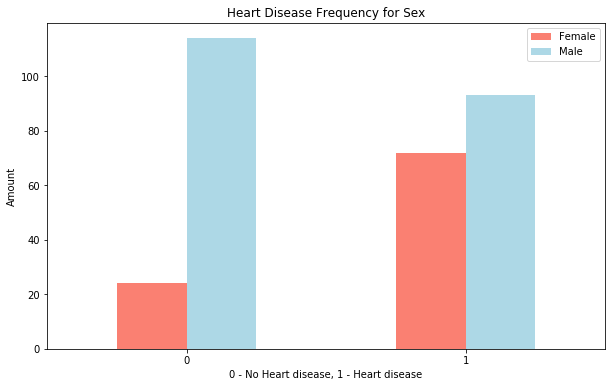

In [15]:
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 - No Heart disease, 1 - Heart disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

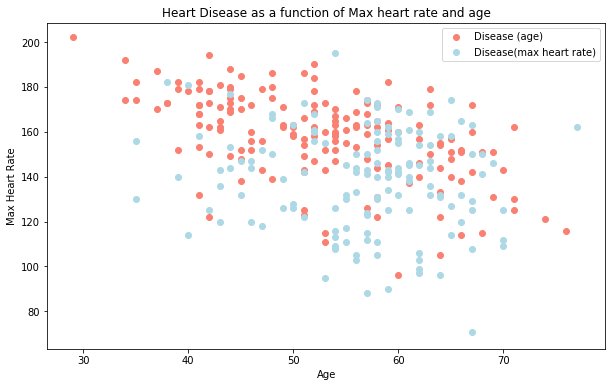

In [24]:
# create another figure 
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df['target'] == 1],
           df.thalach[df['target'] == 1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df['target'] == 0],
            df.thalach[df['target']==0],
            c='lightblue');

# add some info
plt.title('Heart Disease as a function of Max heart rate and age')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease (age)','Disease(max heart rate)'])

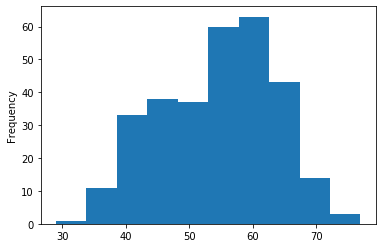

In [25]:
# check the distribution of the age column with a histogram
df.age.plot.hist()

### Heart Disease frequency per chest pain type

<ol>
    <li> cp - chest pain type
        <ul>
            <li>0: typical angina - chest pain related decrease blood supply to the heart</li>
            <li>1: atypical angina - chest pain not related to heart</li>
            <li>2: non-anginal pain - typically esophageal spasms (non heart related) </li>
            <li>3: asymptomatic - chest pain not showing signs of disease</li>
        </ul>
    </li>
</ol>

In [27]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [28]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

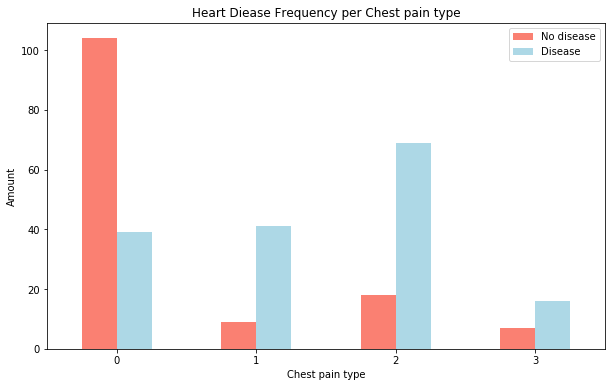

In [35]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'])
plt.title('Heart Diease Frequency per Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount')
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0)